# Create sets, Run model and Compare

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
pathstoadd = ['../find_craters_with_model/','../data_preparation/','../utils/']
[sys.path.append(dir) for dir in pathstoadd]
# import create_and_run

[None, None, None]

## 1. 120 m/pix map: 

In [3]:
crop_sizes_set = [[256, 64], [512, 128], [1024, 256], [2048, 512], [4096, 1024]]

set_dir = '../../data/model_input_images/test1_SLDEM120_108_126_12_24'
craters1 = pd.read_csv(set_dir+'/craters_table.csv')#, header=0, names=['Diameter (km)', 'Lat', 'Long','1024','2048','512','256'])[['Diameter (km)', 'Lat', 'Long','256','512','1024','2048']]
set_dir = '../../data/model_input_images/test1_SLDEM60_before_108_126_12_24'
craters2 = pd.read_csv(set_dir+'/craters_table.csv')#, header=0, names=['Diameter (km)', 'Lat', 'Long','1024','2048','512','256','4096'])[['Diameter (km)', 'Lat', 'Long','256','512','1024','2048','4096']]
set_dir = '../../data/model_input_images/test1_SLDEM60_after_108_126_12_24'
craters3 = pd.read_csv(set_dir+'/craters_table.csv')#, header=0, names=['Diameter (km)', 'Lat', 'Long','1024','2048','512','256','4096'])[['Diameter (km)', 'Lat', 'Long','256','512','1024','2048','4096']]


print('RECALL (%):')
print('window size (km)    :   {}   all '.format(([round(crop[0]*60/1000) for crop in crop_sizes_set])))
print('for 120 m/pix, 8-bit:  NA  {} '.format(craters1.iloc[:,3:].mean(axis=0).values.round(3)*100)) 
print('for 60 m/pix, before: {} '.format(craters2.iloc[:,3:].mean(axis=0).values.round(3)*100)) 
print('for 60 m/pix, after : {} '.format(craters3.iloc[:,3:].mean(axis=0).values.round(3)*100)) 

RECALL (%):
window size (km)    :   [15, 31, 61, 123, 246]   all 
for 120 m/pix, 8-bit:  NA  [15.2 57.4 72.1 77.9 85.2] 
for 60 m/pix, before: [ 0.  23.4 61.9 79.1 80.3 88.1] 
for 60 m/pix, after : [ 0.4 32.4 66.8 79.9 82.  89.3] 


In [158]:
import os
import re
[x[0] for x in os.walk(set_dir)][1:]
[(re.findall('ws_(\d+)',all_folders[i])) for i in range(4)]

[['1024'], ['2048'], ['512'], ['256']]

In [161]:
# folder = []#len(crop_sizes_set)
for i, crop in enumerate(crop_sizes_set): 
    folder=("{}/ws_{}_ol_{}".format(set_dir, crop[0], crop[1]))
    print(folder)
    print(i)

../../data/model_input_images/test1_SLDEM60_after_108_126_12_24/ws_256_ol_64
0
../../data/model_input_images/test1_SLDEM60_after_108_126_12_24/ws_512_ol_128
1
../../data/model_input_images/test1_SLDEM60_after_108_126_12_24/ws_1024_ol_256
2
../../data/model_input_images/test1_SLDEM60_after_108_126_12_24/ws_2048_ol_512
3
../../data/model_input_images/test1_SLDEM60_after_108_126_12_24/ws_4096_ol_1024
4


In [156]:
# crop_sizes_set = [[256, 64], [512, 128], [1024, 256], [2048, 512]]
crop_sizes_set = [[256, 64], [512, 128], [1024, 256], [2048, 512], [4096, 1024]]

# set_dir = '../../data/model_input_images/test1_SLDEM120_108_126_12_24'
# craters1 = pd.read_csv(set_dir+'/craters_table.csv', header=0, names=['Diameter (km)', 'Lat', 'Long','1024','2048','512','256'])[['Diameter (km)', 'Lat', 'Long','256','512','1024','2048']]
# set_dir = '../../data/model_input_images/test1_SLDEM60_before_108_126_12_24'
# craters = pd.read_csv(set_dir+'/craters_table.csv', header=0, names=['Diameter (km)', 'Lat', 'Long','1024','2048','512','256','4096'])[['Diameter (km)', 'Lat', 'Long','256','512','1024','2048','4096']]
set_dir = '../../data/model_input_images/test1_SLDEM60_after_108_126_12_24'
craters = pd.read_csv(set_dir+'/craters_table.csv', header=0, names=['Diameter (km)', 'Lat', 'Long','1024','2048','512','256','4096'])[['Diameter (km)', 'Lat', 'Long','256','512','1024','2048','4096']]

df = pd.DataFrame(data=craters.iloc[:,3:].values.astype('bool'), columns=["ws_{}_ol_{}".format(crop[0], crop[1]) for crop in crop_sizes_set])
df['all'] = df.any(axis=1)
all_craters = craters1.iloc[:,0:3]
df2=pd.concat([all_craters,df], axis=1)

df2.to_csv (set_dir + '/craters_table.csv', index = None, header=True)
df2.tail()

,Diameter (km),Lat,Long,ws_256_ol_64,ws_512_ol_128,ws_1024_ol_256,ws_2048_ol_512,ws_4096_ol_1024,all
239,13.414966,23.840338,116.792664,False,False,True,True,True,True
240,14.291867,23.963202,120.697786,False,False,False,True,False,True
241,11.142690,23.980065,109.399190,False,False,False,False,False,False
242,41.863286,23.988137,119.757160,False,False,False,False,True,True
243,10.481782,23.994520,118.218841,False,False,False,False,False,False


In [127]:
["ws_{}_ol_{}".format(crop[0], crop[1]) for crop in crop_sizes_set]

['ws_256_ol_64', 'ws_512_ol_128', 'ws_1024_ol_256', 'ws_2048_ol_512']

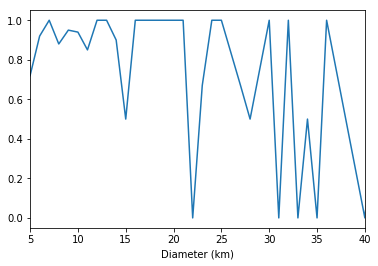

In [130]:

craters1['all'] = craters1.iloc[:,3:].any(axis=1)
df = round(craters1.round().groupby('Diameter (km)').mean(),2)
df.iloc[:,-1].plot()
plt.xlim([5,40]);

In [16]:
(n,bins) = np.histogram(craters3['Diameter (km)'])
bins
# [mean()]

array([  5.004609 ,  22.5692635,  40.133918 ,  57.6985725,  75.263227 ,
        92.8278815, 110.392536 , 127.9571905, 145.521845 , 163.0864995,
       180.651154 ])

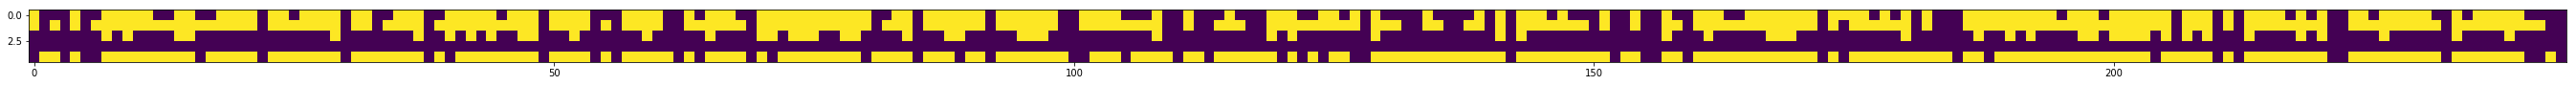

In [19]:
plt.figure(figsize=(50,1))
plt.imshow(craters2.iloc[:,3:].T)

In [60]:
craters.head()

,Diameter (km),Lat,Long,256,512,1024,2048,4096
0,10.757335,12.002476,111.205182,1.0,1.0,0.0,0.0,0.0
1,9.063455,12.002476,109.912857,0.0,0.0,0.0,0.0,1.0
2,5.327966,12.089780,122.019350,0.0,1.0,0.0,0.0,1.0
3,66.189299,12.111050,125.483285,0.0,0.0,0.0,0.0,0.0
4,8.461981,12.239928,125.735586,1.0,1.0,0.0,0.0,1.0


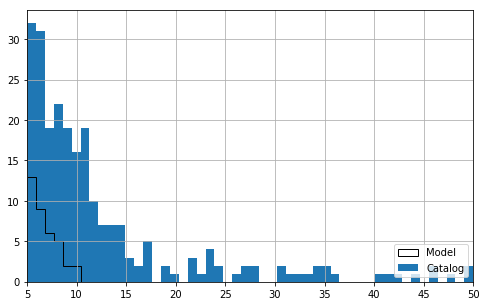

In [48]:
plt.figure(figsize=(8,5))
# plt.rcParams.update({'font.size': 20, 'text.color' : "black", 'axes.labelcolor' : "white", 'xtick.color': "white", 'ytick.color': "white"})

craters1['Diameter (km)'].hist(range=(5,50),bins=50)
# craters.loc[craters.iloc[:,5],'Diameter (km)'].hist(range=(5,50),bins=50, alpha=0.3)
craters1.loc[craters1['256'].astype('bool'),'Diameter (km)'].hist(range=(5,50),bins=50, histtype='step', color='k')
plt.legend(['Model','Catalog'],loc='lower right')
plt.xlim([5,50]);

In [64]:
set_dir = '../../data/model_input_images/test1_SLDEM120_new_catalog_108_126_12_24'
craters_new = pd.read_csv(set_dir+'/craters_table.csv')#, header=0, names=['Diameter (km)', 'Lat', 'Long','1024','2048','512','256'])
set_dir = '../../data/model_input_images/test1_SLDEM120_108_126_12_24'
craters_old = pd.read_csv(set_dir+'/craters_table.csv', header=0, names=['Diameter (km)', 'Lat', 'Long','1024','2048','512','256'])
craters_new['Diameter (km)'].hist(range=(5,50),bins=50)
craters_old['Diameter (km)'].hist(range=(5,50),bins=50)
legend(['new','old'])

['../../data/model_input_images/test1_SLDEM60_after_108_126_12_24/ws_1024_ol_256',
 '../../data/model_input_images/test1_SLDEM60_after_108_126_12_24/ws_2048_ol_512',
 '../../data/model_input_images/test1_SLDEM60_after_108_126_12_24/ws_512_ol_128',
 '../../data/model_input_images/test1_SLDEM60_after_108_126_12_24/ws_256_ol_64',
 '../../data/model_input_images/test1_SLDEM60_after_108_126_12_24/ws_4096_ol_1024']

In [37]:
set_dir = '../../data/model_input_images/test3_SLDEM120_old_catalog_108_117_12_18'
craters_old = pd.read_csv(set_dir+'/craters_table.csv')
set_dir = '../../data/model_input_images/test2_SLDEM120_new_catalog_108_117_12_18'
craters_new = pd.read_csv(set_dir+'/craters_table.csv')
crop_sizes_set = [[512, 128], [1024, 256]]

print('RECALL (%):')
print('window size (km)          :  {}   all '.format([int(round(crop[0]*60/1000,-1)) for crop in crop_sizes_set]))
print('map 120 m/pix, catalog old:  {} '.format(craters_old.iloc[:,3:].mean(axis=0).values.round(3)*100)) 
print('map 120 m/pix, catalog new:   {} '.format(craters_new.iloc[:,3:].mean(axis=0).values.round(3)*100)) 

RECALL (%):
window size (km)          :  [30, 60]   all 
map 120 m/pix, catalog old:  [58.2 73.1 79.1] 
map 120 m/pix, catalog new:   [2.  2.7 3.2] 


In [12]:
float(craters_new.loc[craters_new['Diameter (km)']<0.7,'Diameter (km)'].values[0])

0.674323

In [318]:
ctrs = pd.HDFStore(set_dir + '/ws_1024_ol_256/train_craters.hdf5', 'r')


In [365]:
my_craters=ctrs['img_00000']
pixel_coordinates = pd.concat([my_craters[['x','y']], my_craters['Diameter (pix)']/2], axis=1).values
# pixel_coordinates
# pixel_coordinates[2] /= 2
real_coordinates = my_craters[['Diameter (km)','Lat','Long']].values
real_coordinates
# pixel_coordinates
# print((my_craters['Diameter (pix)']/2),my_craters[['x','y']].values)

array([[  8.014419,  14.637669, 108.627426],
       [ 11.289912,  14.675577, 109.692301],
       [ 10.557939,  14.728418, 111.905908],
       [129.365072,  14.939197, 109.465022],
       [  8.65474 ,  15.045469, 108.403423],
       [ 11.93331 ,  15.133921, 111.971386],
       [  5.442088,  15.521044, 108.935286],
       [ 11.06134 ,  15.734708, 111.638254],
       [  5.562578,  15.751939, 109.894478],
       [  7.931825,  15.884043, 109.005359],
       [  6.188873,  16.159739, 108.921501],
       [ 15.311953,  16.253935, 108.579179],
       [ 11.425175,  16.54916 , 111.413102],
       [  8.090149,  17.023586, 109.163884],
       [  6.730134,  17.128121, 109.948468],
       [ 44.577621,  17.789375, 109.304089]])

In [42]:
import detect_craters_with_model
from keras.models import load_model
from time import time
import utils.processing as proc
import utils.template_match_target as tmt

model_path = '../../data/trained_model/Silburt/model_keras1.2.2.h5'
#model_path = '../../data/trained_model/Silburt/model_keras2.h5'
model = load_model(model_path)

In [67]:
import h5py
set_dir = '../../data/model_input_images/test3_SLDEM120_old_catalog_108_117_12_18'
[sd_input_images,ctrs] = detect_craters_with_model.get_images_data_from_path(set_dir + '/ws_1024_ol_256')
images = h5py.File(set_dir + '/ws_1024_ol_256' + '/train_images.hdf5', 'r')
sample_data = {'imgs': [images['input_images'][...].astype('float32'),
                        images['target_masks'][...].astype('float32')]}
proc.preprocess(sample_data)
sd_input_images = sample_data['imgs'][0]
sd_target_masks = sample_data['imgs'][1]
ctrs = pd.HDFStore(set_dir + '/ws_1024_ol_256' + '/train_craters.hdf5', 'r')
pred = model.predict(sd_input_images)

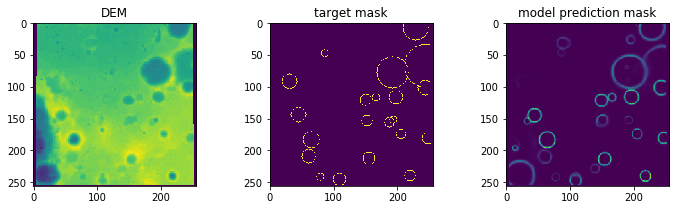

In [71]:
plt.figure(figsize=(12,3))
i=2
plt.subplot(131);plt.imshow(np.squeeze(sd_input_images[i,:,:]));plt.title('DEM')
plt.subplot(132);plt.imshow(np.squeeze(sd_target_masks[i,:,:]));plt.title('target mask')
plt.subplot(133);plt.imshow(pred[i]);plt.title('model prediction mask');

In [74]:
predicted = tmt.template_match_t(pred[i], minrad=2.)
predicted

array([[210,   4,   2],
       [248,   5,   2],
       [191,  52,   2],
       [195,  52,   2],
       [213,  61,   2],
       [218,  73,   2],
       [193, 104,   2],
       [ 64, 171,   2],
       [ 70, 209,   2],
       [ 43, 235,   2],
       [104, 239,   2],
       [ 43, 242,   2],
       [ 13, 196,   3],
       [ 32, 154,   5],
       [164, 117,   6],
       [203, 174,   8],
       [150, 153,   9],
       [246, 180,   9],
       [216, 240,   9],
       [109, 247,   9],
       [150, 122,  10],
       [195, 116,  11],
       [ 45, 144,  11],
       [153, 214,  10],
       [243, 102,  12],
       [ 65, 183,  13],
       [227,   6,  21],
       [ 22, 238,  22],
       [193,  78,  25]])

In [75]:
gt = tmt.template_match_t(np.squeeze(sd_target_masks[i,:,:]), minrad=2.)
gt

array([[ 85,  48,   5],
       [ 78, 241,   5],
       [204, 174,   7],
       [154, 212,   9],
       [108, 245,   9],
       [ 30,  92,  11],
       [ 44, 144,  11],
       [ 64, 183,  12]])

In [88]:
my_craters = ctrs['img_0000{}'.format(i)]
# np.concatenate([.iloc[:,3:5].round().values,ctrs['img_0000{}'.format(i)].iloc[:,5].round()],axis=1)
pd.concat([my_craters[['x','y']], my_craters['Diameter (pix)']/2], axis=1).values.round()

array([[108., 245.,  10.],
       [ 78., 242.,   6.],
       [218., 240.,   9.],
       [154., 213.,  10.],
       [ 60., 209.,  11.],
       [ 65., 183.,  13.],
       [246., 181.,   9.],
       [205., 174.,   8.],
       [186., 157.,   8.],
       [151., 153.,   9.],
       [192., 153.,   6.],
       [ 44., 145.,  12.],
       [149., 122.,   9.],
       [166., 118.,   6.],
       [196., 117.,  11.],
       [243., 102.,  12.],
       [ 31.,  93.,  12.],
       [191.,  78.,  25.],
       [244.,  69.,  34.],
       [ 86.,  49.,   6.],
       [227.,   9.,  20.]])

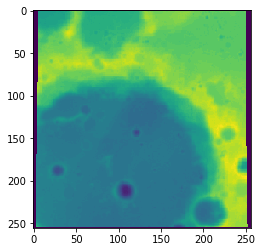